## 1. Importando as bibliotecas

In [107]:
import numpy as np
import pandas as pd

import seaborn as sns

***

## 2. Carregando os dados

In [2]:
FILE = '../data/dados.csv'

In [4]:
dados = pd.read_csv(FILE)

In [5]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


***

## 3. Sobre os dados

Pesquisa Nacional por Amostra de Domicílios - 2015 (PNAD 2015)<br>
<br>
A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

Fonte: https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

***

## 4. Analisando os dados

### Informações gerais

In [12]:
dados.shape

(76840, 7)

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [6]:
vars_cat = ['UF', 'Sexo', 'Cor']
vars_num = ['Idade', 'Anos de Estudo', 'Renda', 'Altura']

In [9]:
print(sorted(dados['UF'].unique()))

[11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 41, 42, 43, 50, 51, 52, 53]


In [10]:
print(sorted(dados['Sexo'].unique()))

[0, 1]


In [11]:
print(sorted(dados['Cor'].unique()))

[0, 2, 4, 6, 8]


In [17]:
dados.drop(['UF', 'Cor'], axis=1).describe()

,Sexo,Idade,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,0.307002,44.071421,9.469664,2000.383199,1.699512
std,0.461253,12.480583,4.539929,3323.387730,0.079717
min,0.000000,13.000000,1.000000,0.000000,1.339245
25%,0.000000,34.000000,6.000000,788.000000,1.645785
50%,0.000000,43.000000,11.000000,1200.000000,1.699325
75%,1.000000,53.000000,12.000000,2000.000000,1.753062
max,1.000000,99.000000,17.000000,200000.000000,2.028497


<hr style="border:0.5px dashed gray"> </hr>

### Analisando as distribuições

In [90]:
def dist(df, var, dict_labels=None, index_name=None):
    
    freq = df[var].value_counts()
    perc = df[var].value_counts(normalize=True)
    
    data = {'frequencia': freq, 'percentual': perc}
    new_df = pd.DataFrame(data)
    
    if dict_labels != None:
        new_df.rename(index=dict_labels, inplace=True)
    
    if dict_labels != None:
        new_df.rename_axis(index_name, axis='columns', inplace=True)
    
    return new_df

In [70]:
sexo_labels = {
    0: 'Masculino',
    1: 'Feminino'
}

In [61]:
sexo_dist = dist(df=dados, var='Sexo', dict_labels={0: 'Masculino', 1: 'Feminino'}, index_name='sexo')

In [62]:
sexo_dist

sexo,frequencia,percentual
Masculino,53250,0.692998
Feminino,23590,0.307002


In [63]:
cor_labels = {
   0: 'Indígena', 
   2: 'Branca', 
   4: 'Preta', 
   6: 'Amarela', 
   8: 'Parda', 
   9: 'Sem declaração'
}

In [65]:
cor_dist = dist(df=dados, var='Cor', dict_labels=cor_labels, index_name='cor')

In [68]:
cor_dist

cor,frequencia,percentual
Parda,35925,0.467530
Branca,31815,0.414042
Preta,8391,0.109201
Indígena,357,0.004646
Amarela,352,0.004581


<hr style="border:0.5px dashed gray"> </hr>

### Crosstab (Tabela Cruzada)

In [73]:
# Frequência / Volume / Quantidade
ct = pd.crosstab(dados['Sexo'], dados['Cor'])
ct.rename(index=sexo_labels, columns=cor_labels)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [74]:
# Percentual / Representatividade
ct2 = pd.crosstab(dados['Sexo'], dados['Cor'], normalize=True)
ct2.rename(index=sexo_labels, columns=cor_labels)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171
Feminino,0.001314,0.125208,0.037598,0.001523,0.141359


In [77]:
# Média de Renda
ct = pd.crosstab(dados['Sexo'], dados['Cor'], aggfunc='mean', values=dados['Renda'])
ct.rename(index=sexo_labels, columns=cor_labels)

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


<hr style="border:0.5px dashed gray"> </hr>

### Categorizando variáveis numéricas

#### Categorizando por labels conhecidos/definidos


Vamos categorizar a renda conforme a classificação a seguir:
- A - Acima de 15.760
- B - De 7.880 a 15.760
- C - De 3.152 a 7.880
- D - De 1.576 a 3.152
- E - Até 1.576

In [78]:
dados['Renda'].min(), dados['Renda'].max()

(0, 200000)

In [80]:
cuts = [0, 1576, 3152, 7880, 15760, np.inf]

In [81]:
labels = ['E', 'D', 'C', 'B', 'A']

In [96]:
dados['renda_cat'] = pd.cut(x=dados['Renda'], bins=cuts, labels=labels, include_lowest=True)

In [97]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,renda_cat
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,C
4,11,1,47,8,9,150,1.690631,E


In [84]:
freq_renda = dist(df=dados, var='renda_cat')

In [85]:
freq_renda

,frequencia,percentual
E,46888,0.633853
D,16700,0.225758
C,7599,0.102727
B,2178,0.029443
A,608,0.008219


In [89]:
freq_renda.sort_index(ascending=False)

,frequencia,percentual
A,608,0.008219
B,2178,0.029443
C,7599,0.102727
D,16700,0.225758
E,46888,0.633853


#### Categorizando pela Regra de Sturges (amplitude fixa)

#### Regra de Sturges:

### $$k = 1 + \frac {10}{3}\log_{10}n$$

In [91]:
n = dados.shape[0]

In [94]:
k = int(1 + (10 / 3) * np.log10(n))

In [95]:
k

17

In [98]:
dados['renda_sturges'] = pd.cut(x=dados['Renda'], bins=k, include_lowest=True)

In [99]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,renda_cat,renda_sturges
0,11,0,23,8,12,800,1.603808,E,"(-200.001, 11764.706]"
1,11,1,23,2,12,1150,1.739790,E,"(-200.001, 11764.706]"
2,11,1,35,8,15,880,1.760444,E,"(-200.001, 11764.706]"
3,11,0,46,2,6,3500,1.783158,C,"(-200.001, 11764.706]"
4,11,1,47,8,9,150,1.690631,E,"(-200.001, 11764.706]"


In [103]:
dados['renda_sturges'].value_counts().sort_index(ascending=True)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: renda_sturges, dtype: int64

In [104]:
freq_renda_stg = dist(df=dados, var='renda_sturges')

In [106]:
freq_renda_stg.sort_index()

,frequencia,percentual
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


<hr style="border:0.5px dashed gray"> </hr>

### Visualizando os histogramas

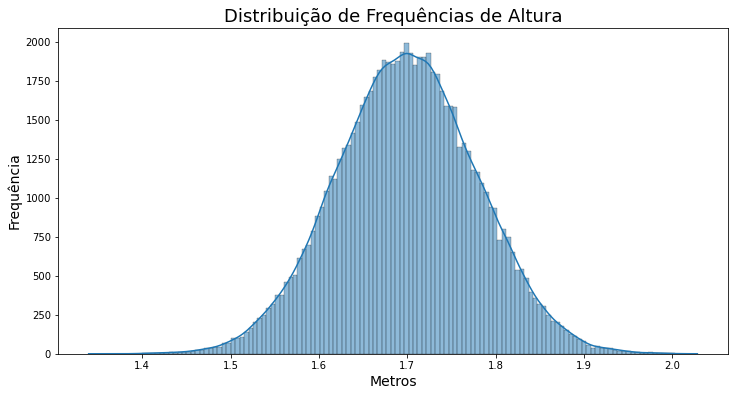

In [118]:
ax = sns.histplot(dados['Altura'], kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências de Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14);

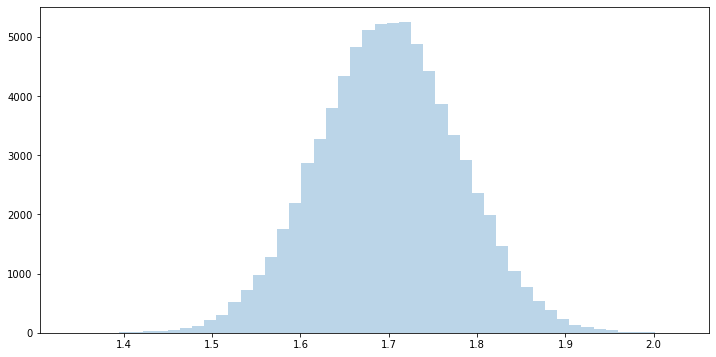

In [123]:
dados['Altura'].hist(bins=50, figsize=(12, 6), alpha=0.3, grid=False);

In [124]:
freq_renda

,frequencia,percentual
E,46888,0.633853
D,16700,0.225758
C,7599,0.102727
B,2178,0.029443
A,608,0.008219


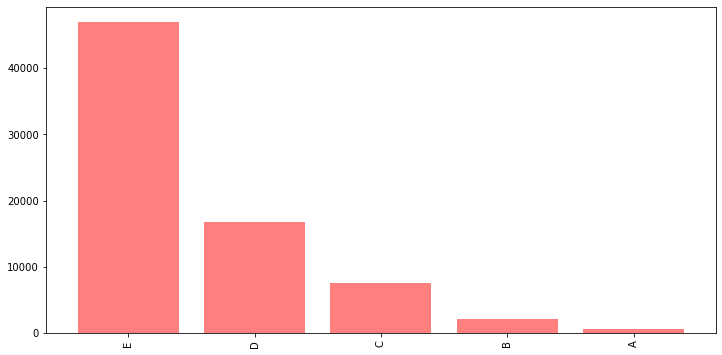

In [132]:
freq_renda['frequencia'].plot.bar(width=0.8, color='red', alpha=0.5, figsize=(12, 6));

<hr style="border:0.5px dashed gray"> </hr>

### Analisando as Medidas de Tendência Central